In [1]:
import face_recognition
from matplotlib import pyplot as plt
import glob
import pickle

ModuleNotFoundError: No module named 'face_recognition'

In [2]:
!conda update --all

Solving environment: done

## Package Plan ##

  environment location: /anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blosc-1.14.4               |       hd9629dc_0         317 KB
    lazy-object-proxy-1.3.1    |   py36h1de35cc_2          29 KB
    twisted-18.7.0             |   py36h1de35cc_1         4.9 MB
    pyodbc-4.0.24              |   py36h0a44026_0          60 KB
    matplotlib-2.2.3           |   py36h54f8f79_0         6.7 MB
    zope-1.0                   |           py36_0           2 KB
    bottleneck-1.2.1           |   py36h1d22016_1         113 KB
    mpmath-1.0.0               |           py36_2         893 KB
    spyder-kernels-0.2.6       |           py36_0          69 KB
    python-3.6.6               |       hc167b69_0        15.4 MB
    ipython-6.5.0              |           py36_0         1.0 MB
    clyent-1.2.2               |           py36_1        

Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting. 



In [2]:
# image = face_recognition.load_image_file("2.jpg")
# image2 = face_recognition.load_image_file("1.bmp")

In [3]:
def get_embedding_faces_in_dir (path):
    paths = glob.glob( path +'*.jpg')
    N = len(paths)
    i = 1
    path_and_embedding = []
    for path_img in paths:
        print (str(i) +' / ' + str(N))
        image = face_recognition.load_image_file(path_img)
        embeddings = face_recognition.face_encodings(image)
        for embedding in embeddings:
            path_and_embedding.append ([path_img, embedding])
        i = i + 1
    return path_and_embedding

In [4]:
path_and_embedding = get_embedding_faces_in_dir ('./input/')


with open('embedings.pickle', 'wb') as f:
    pickle.dump(path_and_embedding, f)


1 / 92
2 / 92
3 / 92
4 / 92
5 / 92
6 / 92
7 / 92
8 / 92
9 / 92
10 / 92
11 / 92
12 / 92
13 / 92
14 / 92
15 / 92
16 / 92
17 / 92
18 / 92
19 / 92
20 / 92
21 / 92
22 / 92
23 / 92
24 / 92
25 / 92
26 / 92
27 / 92
28 / 92
29 / 92
30 / 92
31 / 92
32 / 92
33 / 92
34 / 92
35 / 92
36 / 92
37 / 92
38 / 92
39 / 92
40 / 92
41 / 92
42 / 92
43 / 92
44 / 92
45 / 92
46 / 92
47 / 92
48 / 92
49 / 92
50 / 92
51 / 92
52 / 92
53 / 92
54 / 92
55 / 92
56 / 92
57 / 92
58 / 92
59 / 92
60 / 92
61 / 92
62 / 92
63 / 92
64 / 92
65 / 92
66 / 92
67 / 92
68 / 92
69 / 92
70 / 92
71 / 92
72 / 92
73 / 92
74 / 92
75 / 92
76 / 92
77 / 92
78 / 92
79 / 92
80 / 92
81 / 92
82 / 92
83 / 92
84 / 92
85 / 92
86 / 92
87 / 92
88 / 92
89 / 92
90 / 92
91 / 92
92 / 92


In [4]:
def get_path_to_image (path_and_embedding, unknown_img_face):
    image_unknown = face_recognition.load_image_file(unknown_img_face)
    unknown_encoding = face_recognition.face_encodings(image_unknown)
    path_list=[]
    for biden_embeding in path_and_embedding:
        results = face_recognition.compare_faces(biden_embeding[1], unknown_encoding)
        if results[0] :
            path_list.append(biden_embeding[0])
    return path_list

In [6]:
#images_path_list = get_path_to_image (path_and_embedding,'будников.jpg' )


In [2]:
with open('embedings.pickle', 'rb') as f:
    path_and_embedding = pickle.load(f)
    

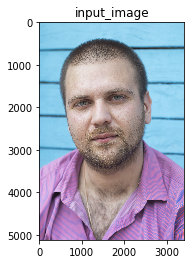

In [8]:
image_input = face_recognition.load_image_file("Будников.jpg")
plt.imshow(image_input)
plt.title ('input_image')
plt.show()

In [5]:
images_path_list = get_path_to_image (path_and_embedding, "Будников.jpg")
print (images_path_list)

['./input/IMG_3905.jpg', './input/IMG_0736.jpg', './input/IMG_0737.jpg', './input/LSH18_zamyslov-108.jpg']


In [6]:
def show_image (images_path_list):
    for image_path in images_path_list:
        image = face_recognition.load_image_file(image_path)
        plt.imshow(image)
        plt.title (image_path.split('/')[2])
        plt.show()

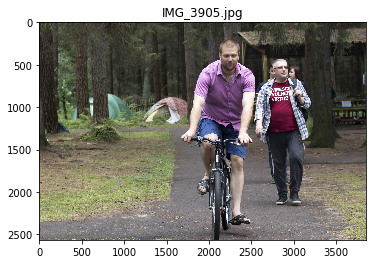

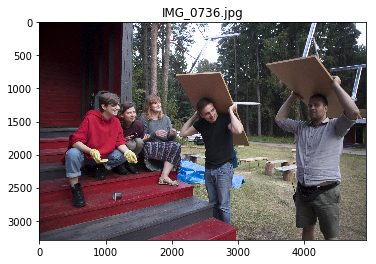

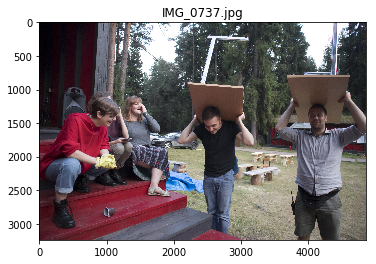

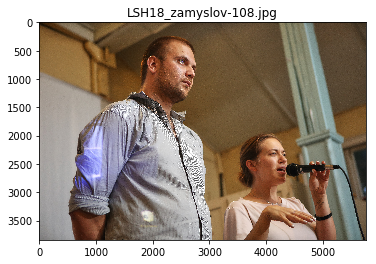

In [7]:
show_image (images_path_list)

In [5]:
import pickle
#with open('embedings.pickle', 'wb') as f:
#    pickle.dump(path_and_embedding, f)
with open('embedings.pickle', 'rb') as f:
    path_and_embedding_r = pickle.load(f)


EOFError: Ran out of input

In [ ]:
#(150, 1182, 305, 1027)
#y:y+h, x:x+w
def get_faces (image):
    face_locs = face_recognition.face_locations(image)
    face_list = []
    for face_loc in face_locs:  
        print (face_loc)
        face_list.append( image[face_loc[0]:face_loc[2],face_loc[3]:face_loc[1]] )
    return face_list

In [ ]:
%matplotlib inline
faces = get_faces(image)
for face in faces:
    plt.imshow(face)
    plt.show()